In [1]:
import numpy as np
import pandas as pd

In [2]:
PATH = "../Data/UMTMVS.csv"

In [3]:
df = pd.read_csv(PATH, index_col='DATE', parse_dates=True)

In [4]:
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UMTMVS  325 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


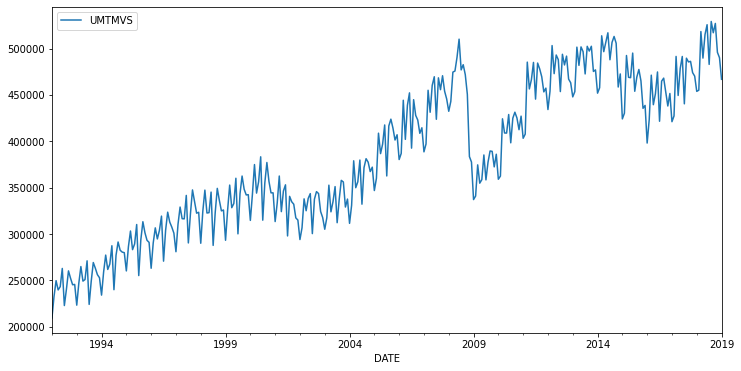

In [6]:
df.plot(figsize=(12, 6))

In [7]:
100 * (df.loc['2019-01-01'] - df.loc['2009-01-01']) / df.loc['2009-01-01']

UMTMVS    38.472149
dtype: float64

In [8]:
100 * (df.loc['2009-01-01'] - df.loc['2008-01-01']) / df.loc['2008-01-01']

UMTMVS   -22.022775
dtype: float64

In [9]:
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

In [10]:
df.sort_values(by='UMTMVS', ascending=False).head(6)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


In [11]:
df.loc['2008-01-01'] - df.loc['2009-01-01'] 

UMTMVS    95206.0
dtype: float64

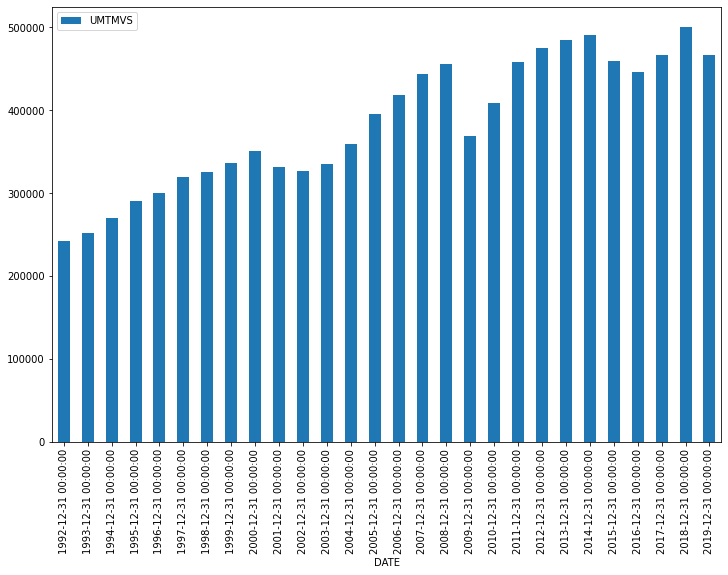

In [12]:
df.resample('Y').mean().plot.bar(figsize=(12, 8))

In [13]:
yearly_data = df.resample('Y').mean()
yearly_data_shift = yearly_data.shift(1)
change = yearly_data - yearly_data_shift
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

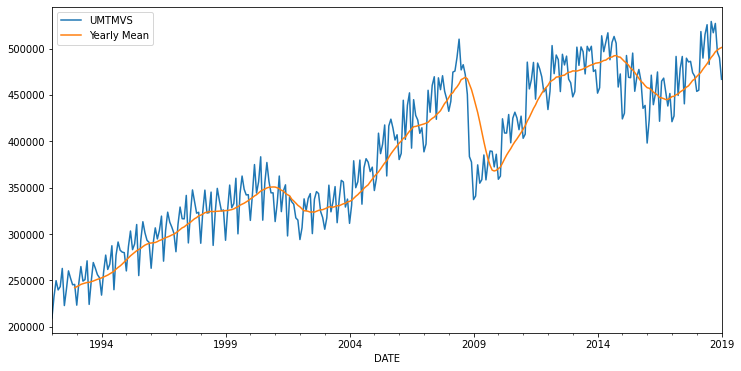

In [14]:
df['Yearly Mean'] = df['UMTMVS'].rolling(window=12).mean()
df.plot(figsize=(12,6))

In [15]:
df = pd.read_csv(PATH, index_col='DATE', parse_dates=True)
df2008 = df.loc['2008-01-01':'2009-12-01']
df2008.loc[df2008.idxmax()]

,UMTMVS
DATE,
2008-06-01,510081.0


In [16]:
df_post_peak = df.loc['2008-06-01':]
df_post_peak[df_post_peak>=510081].dropna()

,UMTMVS
DATE,
2008-06-01,510081.0
2014-03-01,513700.0
2014-06-01,516935.0
2014-09-01,512988.0
2018-03-01,518285.0
2018-05-01,515105.0
2018-06-01,525660.0
2018-08-01,529157.0
2018-09-01,516992.0


In [17]:
len(df.loc['2008-06-01':'2014-03-01'])

70